# Model Version 1

Objective : To build Skeleton Model with decent accuracy.

## Importing Libraries



In [22]:
import torch
import torch.nn as nn # All NN Layers
import torch.nn.functional as F # to get loss fucnction
import torch.optim as optim # Optimizer Fucntion
from torchvision import datasets, transforms #Loading Dataset and transform function to perform transformation
from torchsummary import summary # To view summary
%matplotlib inline
import matplotlib.pyplot as plt # To plot graphs
from torch.optim.lr_scheduler import StepLR,OneCycleLR, ReduceLROnPlateau
from tqdm import tqdm
from model import Model_1 # model.py
from utils import *
from torch.utils.data import DataLoader, Dataset



## Data Transformation

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(), # Converting to Tensor
                                       transforms.Normalize((0.1307,),(0.3081,)) # Normalizing the dataset with the mean and std
                                      ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                    transforms.ToTensor(), # Converting to Tensor
                                    transforms.Normalize((0.1307,),(0.3081,))  # Normalizing the dataset using mean and std
                                  ])

## Dataset Cleaning and Train/Test Split

In [15]:
train = datasets.MNIST('./data',train= True,download= True, transform = train_transforms) # Downloading Train set
test = datasets.MNIST('./data',train= False,download= True, transform = test_transforms) # Downloading Test set

## CONSTANTS

In [5]:
SEED = 1
BATCHSIZE = 128
BATCHSIZE_2 = 64
NUM_OF_WORKER = 4
EPOCHS = 15

## Data Loading

In [17]:
# Checking for CUDA
cuda = torch.cuda.is_available()
print("CUDA Available",cuda)

torch.manual_seed(SEED)
if cuda:
  torch.cuda.manual_seed(SEED)

kwargs = {'shuffle' : True,'batch_size' : BATCHSIZE,'num_workers': 4, 'pin_memory': True} if cuda else {'shuffle' : True,'batch_size' : BATCHSIZE_2}

train_loader = torch.utils.data.DataLoader(train, **kwargs) # creating train data loader
test_loader = torch.utils.data.DataLoader(test, **kwargs) # creating test dataloader

CUDA Available True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary


In [20]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = Model_1().to(device)
summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 64, 24, 24]           9,216
       BatchNorm2d-4           [-1, 64, 24, 24]             128
            Conv2d-5           [-1, 32, 24, 24]           2,048
         MaxPool2d-6           [-1, 32, 12, 12]               0
            Conv2d-7           [-1, 64, 10, 10]          18,432
       BatchNorm2d-8           [-1, 64, 10, 10]             128
            Conv2d-9             [-1, 64, 8, 8]          36,864
      BatchNorm2d-10             [-1, 64, 8, 8]             128
           Conv2d-11             [-1, 64, 6, 6]          36,864
      BatchNorm2d-12             [-1, 64, 6, 6]             128
        AvgPool2d-13             [-1, 64, 1, 1]               0
           Conv2d-14             [-1, 1

## Model training

In [24]:
model =  Model_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.0510 Batch_id=468 Accuracy=94.99: 100%|██████████| 469/469 [00:17<00:00, 27.38it/s]


Test set: Average loss: 0.0466, Accuracy: 9886/10000 (98.86%)

Epoch 2


Train: Loss=0.0376 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:17<00:00, 27.11it/s]


Test set: Average loss: 0.0515, Accuracy: 9854/10000 (98.54%)

Epoch 3


Train: Loss=0.0382 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:17<00:00, 27.28it/s]


Test set: Average loss: 0.0262, Accuracy: 9934/10000 (99.34%)

Epoch 4


Train: Loss=0.0040 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:16<00:00, 27.79it/s]


Test set: Average loss: 0.0248, Accuracy: 9930/10000 (99.30%)

Epoch 5


Train: Loss=0.0139 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:17<00:00, 26.70it/s]


Test set: Average loss: 0.0227, Accuracy: 9932/10000 (99.32%)

Epoch 6


Train: Loss=0.0171 Batch_id=468 Accuracy=99.58: 100%|██████████| 469/469 [00:16<00:00, 28.00it/s]


Test set: Average loss: 0.0200, Accuracy: 9936/10000 (99.36%)

Epoch 7


Train: Loss=0.0031 Batch_id=468 Accuracy=99.63: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]


Test set: Average loss: 0.0180, Accuracy: 9943/10000 (99.43%)

Epoch 8


Train: Loss=0.0079 Batch_id=468 Accuracy=99.71: 100%|██████████| 469/469 [00:17<00:00, 26.92it/s]


Test set: Average loss: 0.0214, Accuracy: 9934/10000 (99.34%)

Epoch 9


Train: Loss=0.0097 Batch_id=468 Accuracy=99.80: 100%|██████████| 469/469 [00:18<00:00, 25.44it/s]


Test set: Average loss: 0.0209, Accuracy: 9938/10000 (99.38%)

Epoch 10


Train: Loss=0.0061 Batch_id=468 Accuracy=99.85: 100%|██████████| 469/469 [00:18<00:00, 25.99it/s]


Test set: Average loss: 0.0180, Accuracy: 9951/10000 (99.51%)

Epoch 11


Train: Loss=0.0067 Batch_id=468 Accuracy=99.86: 100%|██████████| 469/469 [00:19<00:00, 24.40it/s]


Test set: Average loss: 0.0178, Accuracy: 9941/10000 (99.41%)

Epoch 12


Train: Loss=0.0008 Batch_id=468 Accuracy=99.89: 100%|██████████| 469/469 [00:17<00:00, 26.29it/s]


Test set: Average loss: 0.0167, Accuracy: 9944/10000 (99.44%)

Epoch 13


Train: Loss=0.0027 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:18<00:00, 25.44it/s]


Test set: Average loss: 0.0156, Accuracy: 9948/10000 (99.48%)

Epoch 14


Train: Loss=0.0025 Batch_id=468 Accuracy=99.95: 100%|██████████| 469/469 [00:19<00:00, 23.45it/s]


Test set: Average loss: 0.0176, Accuracy: 9940/10000 (99.40%)

Epoch 15


Train: Loss=0.0015 Batch_id=468 Accuracy=99.96: 100%|██████████| 469/469 [00:17<00:00, 27.05it/s]


Test set: Average loss: 0.0170, Accuracy: 9945/10000 (99.45%)



Text(0.5, 1.0, 'Test Accuracy')

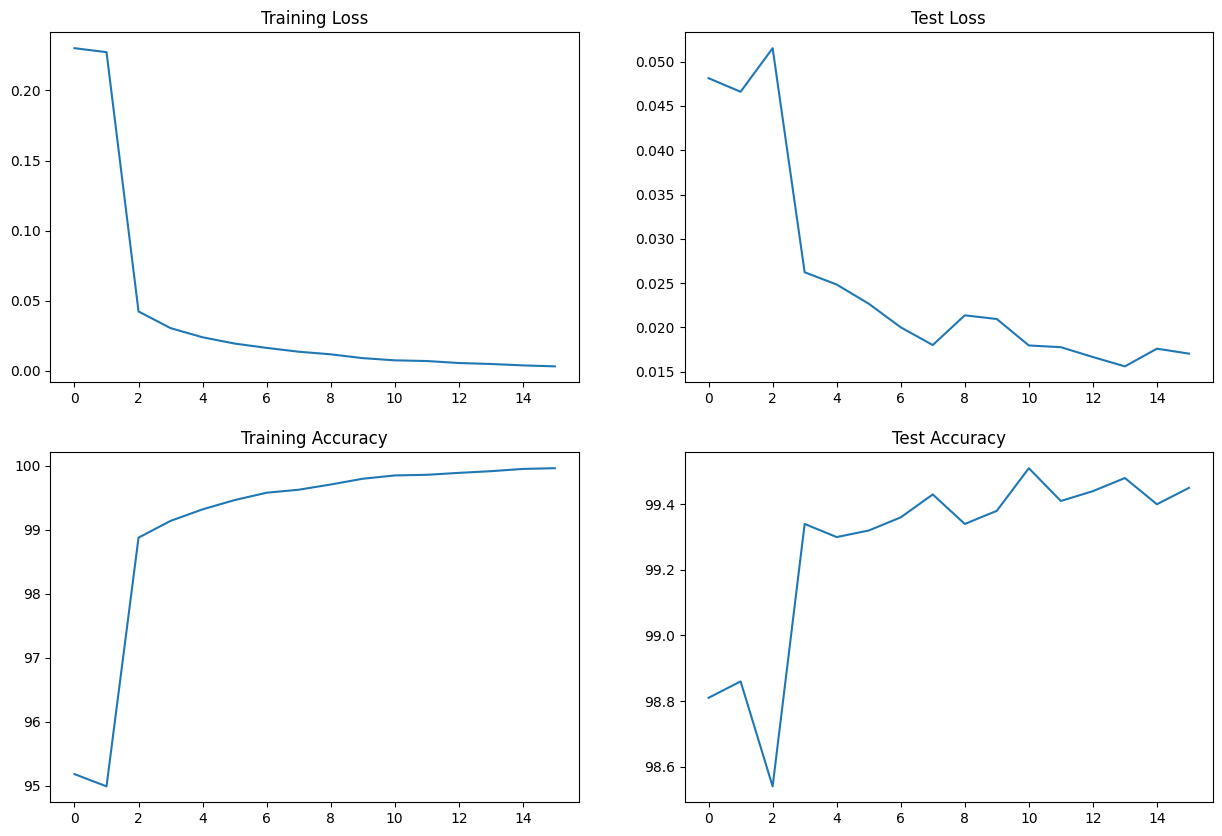

In [25]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [30]:
print(f'Training Accuracy : {max(train_acc)}')
print(f'Test Accuracy:{max(test_acc)}')

Training Accuracy : 99.96333333333334
Test Accuracy:99.51


## Results :

* Model : Model_1
* Targets: Consistent 99.4% Test accuracy , Less than 8k Parameters
* Results:
    - Training Accuracy : 99.96
    - Test Accuracy : 99.51
    - Parameters : 104,762

### Analysis:
* Model Overfits after 7 epoch.
* Scope to reduce parameters and add dropout layer to regulate overfit.
* Model reached best test accuracy at 10th epoch.